DDoS Attack Detection System

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [2]:
dt = pd.read_csv('dataset_sdn.csv')

In [3]:
dt.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [4]:
dt.dtypes.value_counts()

int64      17
object      3
float64     3
dtype: int64

In [5]:
print(f"Number of NUMERIC features: 20 \n")
print(f"Number of OBJECT features: 3 \n")
# object datatype : string OR mixed;  (Can't be used in Regression)

Number of NUMERIC features: 20 

Number of OBJECT features: 3 



In [6]:
dt.info()
#total number of data points= 10435; #attributes = 23 (inlcuding 'label')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [7]:
dt.label.unique()
# binary label =, ie. '0' or '1'

array([0, 1], dtype=int64)

Label :       MALICIOUS : 1; BENIGN : 0

In [8]:
dt.label.value_counts()

0    63561
1    40784
Name: label, dtype: int64

In [9]:
# # label_dict = dict(dt.label.value_counts())
# x = dt.label
# sns.countplot(arg: x)
# # label_dict

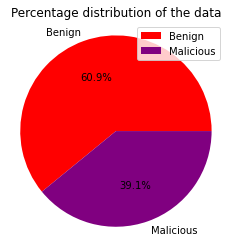

In [10]:
labels = ["Benign", "Malicious"] 
counts = [dt.label.value_counts()[0], dt.label.value_counts()[1]]
# plt.figure(figsize = (13,8))
plt.pie(counts, labels= labels, radius=1.1, colors=['red', 'purple'], labeldistance=1.1, autopct='%1.1f%%')
plt.legend()
plt.title("Percentage distribution of the data")
plt.show()

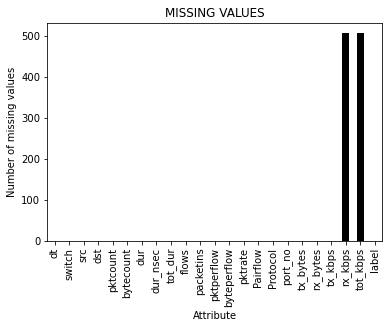

In [11]:
dt.isna().sum().plot.bar(color='black')
plt.title("MISSING VALUES")
plt.xlabel("Attribute")
plt.ylabel("Number of missing values")
plt.show()

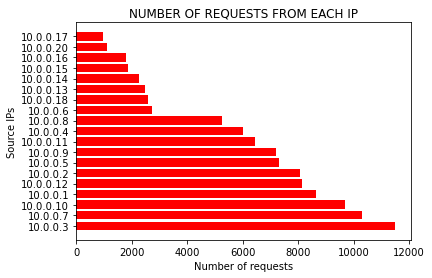

In [12]:
# dt.src.value_counts().plot.barh(color='red')
plt.barh(dt.src.value_counts().keys(),list(dt.src.value_counts()), color='red')
plt.title("NUMBER OF REQUESTS FROM EACH IP")
plt.xlabel("Number of requests")
plt.ylabel("Source IPs")
plt.show()

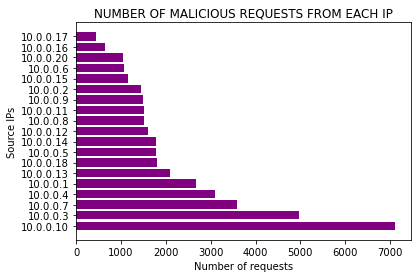

In [13]:
plt.barh(dt[dt['label']==1].src.value_counts().keys(), list(dt[dt['label']==1].src.value_counts()), color='purple')
plt.title("NUMBER OF MALICIOUS REQUESTS FROM EACH IP")
plt.xlabel("Number of requests")
plt.ylabel("Source IPs")
plt.show()

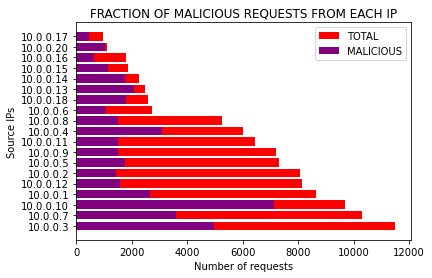

In [14]:
plt.barh(dt.src.value_counts().keys(),list(dt.src.value_counts()), color='red')
plt.barh(dt[dt['label']==1].src.value_counts().keys(), list(dt[dt['label']==1].src.value_counts()), color='purple')
plt.legend(['TOTAL', "MALICIOUS"])
plt.title("FRACTION OF MALICIOUS REQUESTS FROM EACH IP")
plt.xlabel("Number of requests")
plt.ylabel("Source IPs")
plt.show()

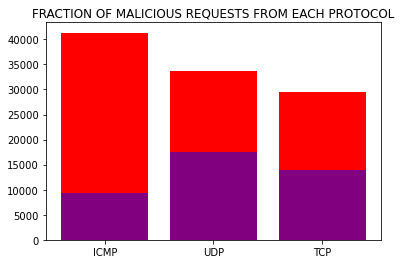

In [36]:
plt.bar(dt.Protocol.value_counts().keys(), list(dt.Protocol.value_counts()), color='red')
plt.bar(dt[dt['label']==1].Protocol.value_counts().keys(), list(dt[dt['label']==1].Protocol.value_counts()), color='purple')
plt.title("FRACTION OF MALICIOUS REQUESTS FROM EACH PROTOCOL")
plt.show()

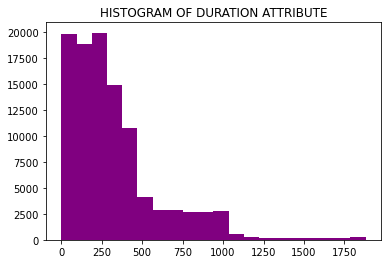

In [37]:
plt.hist(dt.dur, bins=20, color='PURPLE')
plt.title('HISTOGRAM OF DURATION ATTRIBUTE')
plt.show()

In [17]:
dt_0 = dt.copy()
dt_0.dropna(inplace=True)
#dropping the NULL values
dumb_dt = pd.get_dummies(dt_0)
st = StandardScaler()
st.fit(dumb_dt)
dt_1 = st.transform(dumb_dt)
dt_1 = pd.DataFrame(dt_1)
dt_1.columns = dumb_dt.columns
dt_1.drop(['label'], axis=1, inplace=True)
X_train, X_test, Y_train, Y_test = train_test_split(dt_1, dt_0.label, random_state=42, test_size=0.3)

In [18]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
acc_l = []
f1_l = []
for solver in solvers:
    lr = LogisticRegression(C=0.03, solver=solver).fit(X_train,Y_train)
    pred_lr = lr.predict(X_test)
    acc_lr = accuracy_score(Y_test, pred_lr)
    print(f"Accuracy score using {solver} solver: {acc_lr}\n")
    acc_l.append(acc_lr)
    f1_l.append(f1(Y_test, pred_lr))
best_solver = solvers[acc_l.index(max(acc_l))]
lr = LogisticRegression(C=0.03, solver=best_solver).fit(X_train, Y_train)
pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(Y_test, pred_lr)
print(f"Accuracy score of Logistic Regression using the best solver '{best_solver}': {acc_lr}\n")
print(f"CLASSIFICATION REPORT:\n {classification_report(pred_lr, Y_test)}")
maxacc_lr = max(acc_l)
maxf1_lr  = max(f1_l)


Accuracy score using newton-cg solver: 0.841165896250642

Accuracy score using lbfgs solver: 0.8411016949152542

Accuracy score using liblinear solver: 0.8411337955829481

Accuracy score using sag solver: 0.841165896250642

Accuracy score using saga solver: 0.841165896250642

Accuracy score of Logistic Regression using the best solver 'newton-cg': 0.841165896250642

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87     19872
           1       0.76      0.82      0.79     11280

    accuracy                           0.84     31152
   macro avg       0.83      0.84      0.83     31152
weighted avg       0.84      0.84      0.84     31152



In [28]:
K=[5,7,13,19]
acc_l=[]
f1l=[]
for i in K:
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_knn=knn.predict(X_test)
    acc_l.append(accuracy_score(Y_test,pred_knn))
    f1l.append(f1(Y_test,pred_knn))
print(f"Maximum accurcay score for KNN for K={K[acc_l.index(max(acc_l))]}: {max(acc_l)}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(pred_knn, Y_test)}")
maxacc_knn = max(acc_l)
maxf1_knn = max(f1l)

Maximum accurcay score for KNN for K=5: 0.980771700051361

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     19155
           1       0.96      0.97      0.96     11997

    accuracy                           0.97     31152
   macro avg       0.97      0.97      0.97     31152
weighted avg       0.97      0.97      0.97     31152



In [29]:
RF = RandomForestClassifier(n_jobs=-1, n_estimators=500, min_samples_split=10, criterion='gini',max_features='auto',oob_score=True,random_state=1)
RF.fit(X_train, Y_train)
pred_rf = RF.predict(X_test)
acc_rf = accuracy_score(Y_test, pred_rf)
print(f"Accuracy score for Random Forest: {acc_rf}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(pred_rf, Y_test)}")
maxacc_rf = acc_rf
maxf1_rf = f1(Y_test, pred_rf)

Accuracy score for Random Forest: 0.984527478171546

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18962
           1       0.98      0.98      0.98     12190

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152



In [30]:
dt_2 = dt_1.copy()
comp = [2, 5, 10, 13, 15, 19, 21]
max_acc = []
for i in comp:
    pca = PCA(n_components=i)
    pca.fit(dt_2)
    pca_dt = pca.transform(dt_2)
    X_train, X_test, Y_train, Y_test = train_test_split(pca_dt, dumb_dt.label, random_state=42, test_size=0.3)
    solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    results_lr = []
    acc_l = []
    for solver in solvers:
        lr = LogisticRegression(C=0.03, solver=solver).fit(X_train,Y_train)
        pred_lr = lr.predict(X_test)
        acc_lr = accuracy_score(Y_test, pred_lr)
        acc_l.append(acc_lr)
    max_acc.append(max(acc_l))
print(f"Maximum Accuracy score using PCA for 3 components = {max(max_acc)}") 

Maximum Accuracy score using PCA for 3 components = 0.7341101694915254


PCA REDUCED DATA IS GIVING VERY LOW ACCURACY. CLASSIFICATION WITHOUT DATA REDUCTION IS BETTER

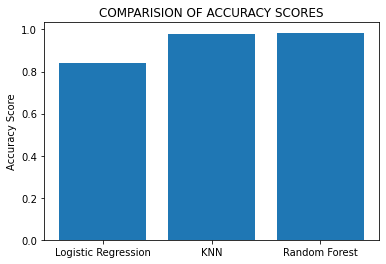

In [33]:
maxacc = [maxacc_lr,  maxacc_knn, maxacc_rf]
plt.bar(['Logistic Regression', 'KNN', 'Random Forest'], maxacc)
plt.title("COMPARISION OF ACCURACY SCORES")
plt.ylabel("Accuracy Score")
plt.show()

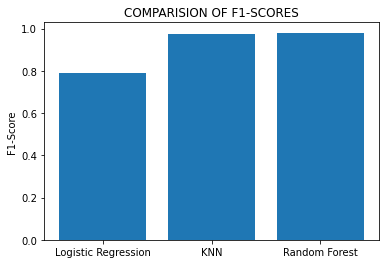

In [34]:
maxf1 = [maxf1_lr, maxf1_knn, maxf1_rf]
plt.bar(['Logistic Regression', 'KNN', 'Random Forest'], maxf1)
plt.title("COMPARISION OF F1-SCORES")
plt.ylabel("F1-Score")
plt.show()

RANDOM FOREST IS THE BEST ALGORITHM AS IT HAS THE MAXIMUM ACCURACY SCORE.